In [1]:
import numpy as np
import os,sys
%matplotlib inline
sys.path.append("D:/measuring/")
sys.path.append(r'D:/measuring/analysis')
import analysis.lib.fitting.common as fitlib
from analysis.lib.Qmemory import CarbonDephasing as CD
reload(CD)
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
import matplotlib
reload(matplotlib)

matplotlib.rc('pdf', fonttype=42)
%matplotlib inline

reloaded
d:\measuring\data
d:\measuring\data
reloaded
d:\measuring\data
reloaded
d:\measuring\data


# Plot and fit pos_neg data to Cosine

d:\measuring\data
reloaded
########################################
Tomo Basis:X
d:\measuring\data\20160510\092733_Memory_NoOfReps_negative_Tomo_X_C1
2
starting fit.fit1d
Converged with chi squared  0.0325543842615
degrees of freedom, dof  16
RMS of residuals (i.e. sqrt(chisq/dof))  0.0451070838821
Reduced chisq (i.e. variance of residuals)  0.00203464901635

fitted parameters at minimum, with 68% C.I.:
 0 A              0.942531 +/-   0.031770
 1 T            222.016881 +/-  14.506947
 2 f              0.003611 +/-   0.000104
 3 phi            1.727340 +/-   3.234863

correlation matrix:
               A         T         f         phi       
         A  1.000000
         T -0.822857  1.000000
         f -0.674745  0.698186  1.000000
       phi  0.684131 -0.674815 -0.938593  1.000000

folder combo: d:\measuring\data\20160510\092733_Memory_NoOfReps_negative_Tomo_X_C1
{'A': 0.94253145043790665, 'phi': 1.727340008909908, 'T': 222.01688068471415, 'f': 0.0036114636268614114}


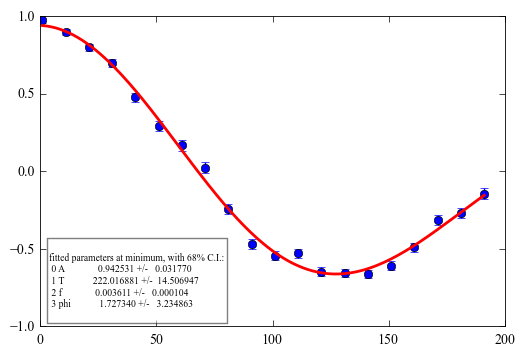

{'A': 0.94253145043790665, 'phi': 1.727340008909908, 'T': 222.01688068471415, 'f': 0.0036114636268614114}
Phase per attempt found: 1.30012690567
Phase offset: 1.72734000891
########################################


In [18]:
reload(CD)

# analysis for N attempts including swap gate
if False:
    for c in [2]:
        for e in ['X']:
            for t in ['X']:
                print '#'*40
                print 'elState: ' + e, 'Tomo Basis:' + t
                fit_results = CD.fit_sin_pos_neg_data(folder_name = '_Tomo_' + str(t) + '_elState_' + e + '_C' + str(c),
                                      offset=[0.0], amplitude = [0.8], center = [0], decay_constant = [300], 
                                      exp_power = [1],
                                      frequency = [1e-100], phase =[0], 
                                      fixed = [0,2,4,5,6],
                                      ylim = [-1,1],
                                      plot_fit = False, do_print = True, show_guess = False, 
                                                      older_than = '20160426_030000')
#                 calculate the phase offset 
#                 f =fit_results['params_dict']['f']
#                 N = 1/f
#                 print 'Phase per attempt found: ' + str(360/N)
#                 print '#'*40



# analysis for MBI and N attempts
if True:
    for t in ['X']:
        print '#'*40
        print 'Tomo Basis:' + t
        fit_results = CD.fit_sin_pos_neg_data(folder_name = '_Tomo_' + str(t) + '_C1',
                              offset=[0.0], amplitude = [0.95], center = [0], decay_constant = [400], 
                              exp_power = [2],
                              frequency = [1/(360./1.5)], phase =[0], 
                              fixed = [0,2,4],
                              ylim = [-1,1],
                              plot_fit = True, do_print = True, show_guess = False, 
                                              older_than = None)
        # calculate the phase offset 
        print fit_results['params_dict']
        f =fit_results['params_dict']['f']
        N = 1/f
        print 'Phase per attempt found: ' + str(360./N)
        print 'Phase offset: ' + str(fit_results['params_dict']['phi'])
        print '#'*40
        


d:\measuring\data
reloaded
starting fit.fit1d
Converged with chi squared  0.0320678537817
degrees of freedom, dof  18
RMS of residuals (i.e. sqrt(chisq/dof))  0.0422083810673
Reduced chisq (i.e. variance of residuals)  0.00178154743232

fitted parameters at minimum, with 68% C.I.:
 0 A              0.089477 +/-   0.023532
 1 T            580.072582 +/- 303.514137

correlation matrix:
               A         T         
         A  1.000000
         T -0.745588  1.000000

starting fit.fit1d
Converged with chi squared  0.0927042797854
degrees of freedom, dof  18
RMS of residuals (i.e. sqrt(chisq/dof))  0.0717651570461
Reduced chisq (i.e. variance of residuals)  0.00515023776585

fitted parameters at minimum, with 68% C.I.:
 0 A              1.029613 +/-   0.049702
 1 T            259.298928 +/-  19.595738

correlation matrix:
               A         T         
         A  1.000000
         T -0.664119  1.000000

starting fit.fit1d
Converged with chi squared  0.0693809549861
degrees of f

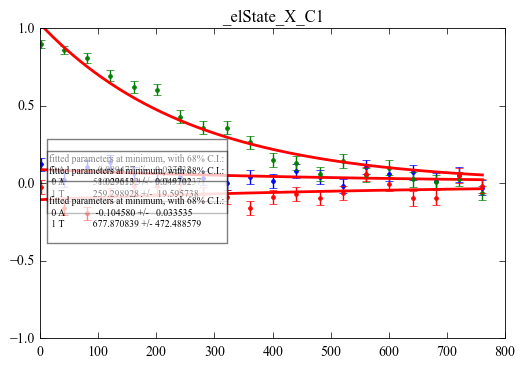

In [20]:
# new version for triple plot and fitting
reload(CD)

tomo_bases = ['X','Y','Z']
if True:
    c = 1;
    for e in ['X']:#,'mX','Y','mY','Z','mZ']:
        amplitudes = [0.8,0.,0.7]
        fit_results = CD.attempt_decay(folder_name = '_elState_' + e + '_C' + str(c),
                                       tomo_basis = tomo_bases,
                              offset=[0.0], amplitude = amplitudes, center = [0], decay_constant = [300], 
                              exp_power = [1],
                              frequency = [1e-100], phase =[0], 
                              fixed = [0,2,4,5,6],
                              ylim = [-1,1],
                              plot_fit = True, do_print = True, show_guess = False, 
                                              older_than = None)# '20160426_030000')

d:\measuring\data
reloaded
18


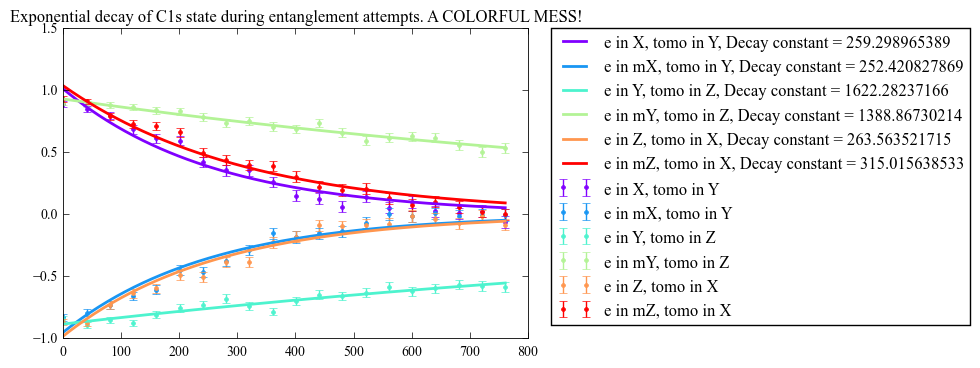

In [26]:
# Analysis script for exponential decay of carbon state during entanglement attempts
reload(CD)

tomo_bases = ['X','Y','Z']
el_bases   = ['X','mX','Y','mY','Z','mZ']
c = 1;
bloch = False
#loads allllll the tomo data
x,y,y_u,f,labels = CD.attempt_decay_all_data(carbon = c,
                                        tomo_basis = tomo_bases,
                                        older_than = None)# '20160426_030000')
fig = plt.figure()
ax =  plt.subplot()
# Maxima tomo bases plot
## pick the maxima
#X->Y(1),mX->mY(4),Y->mZ(8),Y->mZ(11),Z->mX(12),mZ->X(15)


if bloch != True:
    g = [1,4,8,11,12,15]
    y_cur = [y[i] for i in g]
    y_u_cur = [y_u[i] for i in g]
    labels_cur = [labels[i] for i in g]
else:
    y_cur = range(len(y)/3)
    labels_cur = range(len(y_cur))
    ### Go for Bloch vector length. Which is just the squared addition of all the tomos
    for j in range(len(y_bloch)):
        y_temp = [t1 + t2 + t3 for t1, t2, t3 in 
                    zip([i ** 2 for i in y[3*j]], [i ** 2 for i in y[3*j+1]], [i ** 2 for i in y[3*j+2]])]
        y_cur[j] = [i**(0.5) for i in y_temp]
        labels_cur[j] = labels[3*j][0:7]
        # How do I convert uncertainties? Also squared addition but that would increase uncertainty


# #####errorplot the data
CD.errorplot_data(x[0:len(y_u_cur)],y_cur,y_u_cur,ax,labels = labels_cur)


################ fit a exponentially decaying sine to data
CD.fit_and_plot_exp_sin(
    x[0:len(y_cur)],
    y_cur,
    ax,
    offset           = [0], 
    amplitudes        =[0], 
    center           = [0], 
    decay_constant   = [300], 
    exp_power        = [1],
    frequency        = [1e-100], 
    phase            = [0],
    fixed            = [0,2,4,5,6], 
    plot_fit         = True, 
    do_print         = False, 
    show_guess       = False,
    labels           = labels_cur)

ax.set_title('Exponential decay of C'+str(c) + 's state during entanglement attempts. A COLORFUL MESS!');

# phase is off atm

In [285]:

lista = [1,2,3] 
listb = [1,2,3]
listc = [1,2,3]
[i ** 2 for i in lista] + [i ** 2 for i in listb] + [i ** 2 for i in listc]

[x + y + z for x, y, z in zip([i ** 2 for i in lista], [i ** 2 for i in listb], [i ** 2 for i in listb])]

[3, 12, 27]

# Repump Speed

d:\measuring\data
reloaded
folder is  d:\measuring\data\20160705\185243_purifcation slave_Pippin_SIL2_repump_speed
Converged with chi squared  0.0214524772846
degrees of freedom, dof  97
RMS of residuals (i.e. sqrt(chisq/dof))  0.0148714343503
Reduced chisq (i.e. variance of residuals)  0.000221159559635

fitted parameters at minimum, with 68% C.I.:
 0 A              0.888365 +/-   0.015362
 1 tau           33.954060 +/-   1.560578
 2 tau2         338.770209 +/-  45.767004
 3 offs_x        -1.004648 +/-   0.574434

correlation matrix:
               A         tau       tau2      offs_x    
         A  1.000000
       tau  0.735090  1.000000
      tau2  0.872481  0.582406  1.000000
    offs_x -0.157736 -0.473813 -0.123004  1.000000



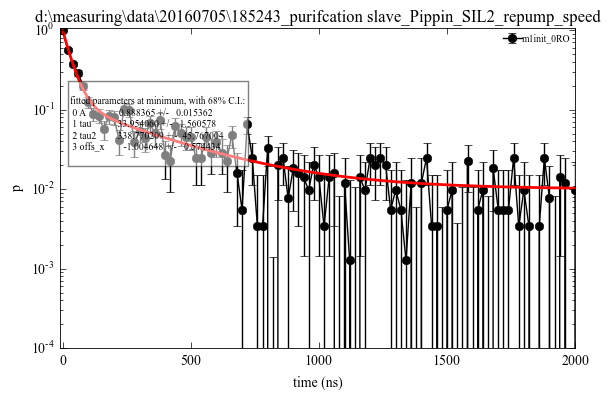

In [3]:
reload(CD)
CD.repump_speed(
    #timestamp='20160120_161935',
    powers = [1000e-9], exclude_first_n_points = 0, log_plot = True,
    amplitude =0.2, decay_constant_one = 20., decay_constant_two = 400., x_offs = 0, offset=0.01, fixed = [0], 
    do_plot = True, do_fit = True, print_fit = True, plot_fit=True,  plot_fit_guess = False, 
    init_states=['m1'], ro_states=['0'])

# Fit exponential decay

In [18]:
reload(CD) 
carbons = ['1']
logicstate_list = ['X']*len(carbons) # Only effective for two-carbon DPS
X_measurement = True
# older_than = '20160401_161202'
older_than = None

CD.Sweep_Rep_List(folder_name = 'NoOfReps', carbons = carbons,
                  logicstate_list = logicstate_list,
                  fit_results = True,
                  ssro_calib_timestamp = None,
                  do_T2correct = False,
                  ymin = 0.1, #uncomment to get minimum of data
                  is_X_measurement = X_measurement,
                  older_than = older_than, #remeber this also changes SSRO calibration!')
                  log_plot = False) 

d:\measuring\data
reloaded
Warning


ValueError: operands could not be broadcast together with shapes (16,) (2,) 

# Fit average repump time

d:\measuring\data
reloaded
True
Converged with chi squared  0.0161512000049
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0366869640845
Reduced chisq (i.e. variance of residuals)  0.00134593333374

fitted parameters at minimum, with 68% C.I.:
 0 a              0.086548 +/-   0.025856
 1 x0             0.101771 +/-   0.012971
 2 A              0.520553 +/-   0.028324
 3 sigma          0.295726 +/-   0.022405

correlation matrix:
               a         x0        A         sigma     
         a  1.000000
        x0 -0.066833  1.000000
         A -0.716921  0.055601  1.000000
     sigma -0.807317  0.040488  0.338584  1.000000

Converged with chi squared  0.0226593924436
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0434543749654
Reduced chisq (i.e. variance of residuals)  0.00188828270363

fitted parameters at minimum, with 68% C.I.:
 0 a          -8388.650222 +/- 2407783.837208
 1 x0             0.175869 +/-   0.055228
 2 A           838

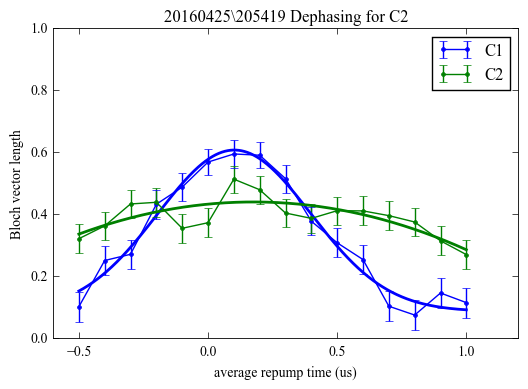

In [32]:
### routine gets raw data for 'X' and 'Y' tomography of a carbon and plots it.
reload(CD)
older_than = '20160425_174011'
older_than = None
is_X_measurement = True
do_T2correct = False

CD.Sweep_Rep_List(carbons = ['1','2'],
    folder_name = 'Memory_Sweep_repump_time_', older_than = older_than, #older than also changes SSRO calib
    do_T2correct = do_T2correct, is_X_measurement = is_X_measurement, ymin=0.0,
    fit_result=True, fitGauss=True, return_fit_params = False)

In [ ]:
### routine gets raw data for 'X' and 'Y' tomography of a carbon and plots it.
reload(CD)
older_than = '20160406_161202'
#older_than = None
is_X_measurement = False
do_T2correct = False
CD.sweep_avg_repump_and_tau_larmor(carbons = ['2'], tau_larmor_list = np.arange(1.9,2.6,0.1),
    folder_name = 'Memory_Sweep_repump_time_', older_than = older_than, #older than also changes SSRO calib
    do_T2correct = do_T2correct, is_X_measurement = is_X_measurement)

## Coupling strength vs repetition decay

In [ ]:
reload(CD)
reload(fitlib)
fig = plt.figure()
ax = plt.subplot()

update_data = True
do_T2correct = False
LogPlot = True
c_idents = ['1','2']
older_than = '20160401_112029'

    
def update_data_func(c_idents,older_than,do_Z = False):

    ### get bloch vector decay
    x,y,y_u,folder = CD.coupling_vs_repetitions(c_idents,older_than = older_than, #SSRO_timestamp = '20160404_152948',
                                                folder_name = 'Memory_NoOfRepetitions_', do_T2correct=do_T2correct)
    y = y[np.argsort(x)]
    y_u = y_u[np.argsort(x)]
        
    print 'update done!!'
    
    if do_Z == False:
        x = np.sort(x*1e-3)
        return x,y,y_u,folder
    
    Z_fits = Z_fits[np.argsort(x)]
    Z_fits_u = Z_fits_u[np.argsort(x)]
    x = np.sort(x*1e-3)
    return x,y,y_u,Z_fits,Z_fits_u,folder

if update_data:
    x,y,y_u,folder = update_data_func(c_idents,older_than = older_than,do_Z = False) # 2 uW break

plt.errorbar(x,y,y_u,fmt = 'ro', label = 'Pippin')

plt.legend(loc=1)#bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Coupling strength (kHz)')   
plt.ylabel('Fitted decay constant')
if older_than != None:
    plt.title('older_than ' + older_than)
else:
    plt.title(CD.get_tstamp_from_folder(folder))

if LogPlot:
    plt.ylim([10,2000])
    plt.xlim([2,100])
    #ax.set_xscale("log", nonposy='clip')
    ax.set_yscale("log", nonposy='clip')
else:
    plt.ylim([0,1000])
#print x== x4
#print x
#print x4
#print folder
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1,0.0005,0)
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_tau(1,0.001,0)
p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_coupl(1,0.0005,0)
#p0,fitfunc,fitfunc_str =fitlib.fit_exp_decay_shifted_with_offset(0,700,40,0) # g_a : offset g_A : initial Amplitude g_tau : decay constant g_x0 : x offse
if False:  # Show Guess
    ax.plot(np.linspace(2,90,201), fitfunc(np.linspace(2,90,201)), ':', lw=2)
    print 'fitfun value ', fitfunc(np.linspace(2,90,21))

#x_fit, y_fit, y_u_fit = numpy.concatenate((x[0:],x_s)), numpy.concatenate((y[0:],y_s)), numpy.concatenate((y_u[0:],y_u_s))

fit_result1 = fit.fit1d(x, y, None, p0 = p0, fitfunc = fitfunc, do_print = True, ret = True, fixed = [0,2])
#p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_constant_offset(1,0.0005,0.08)
p0,fitfunc,fitfunc_str =fitlib.fit_dephasing_coupl(1,0.0005,0)
#plot.plot_fit1d(fit_result1, np.linspace(3,100,1001), ax=ax, color = 'r', plot_data=False, add_txt = False, lw = 2)

if False:
    print 'saving to ', folder
    plt.savefig(os.path.join(folder,'coupling_vs_repetitions.pdf'),format='pdf')
    plt.savefig(os.path.join(folder,'coupling_vs_repeititons.png'),format='png')
plt.show()
plt.close('all')

In [2]:
reload(CD)
# CD.Osci_period(carbon = '5',older_than = None,freq=0,fixed = [0,1,3])
# CD.Osci_period(carbon = '2',older_than = None)
CD.Osci_period(carbon = '1',older_than = None,fit_results = True)

d:\measuring\data
reloaded
[False, False]


TypeError: 'bool' object has no attribute '__getitem__'

## Initialization values for various carbons (execute script 3Qubit_inits)

In [ ]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)
carbon_combinations = [[1,2,3],[1,2,5],[1,2,6],[1,3,5],[1,3,6],[1,5,6],[2,3,5],[2,3,6],[2,5,6],[3,5,6]]
# carbon_combinations = [[1,2,5]]
for kk in carbon_combinations:
    x_label,x,res,res_err = Tomo2.BarPlotTomoContrast(tag = '_'+str(kk[0])+str(kk[1])+str(kk[2])+'_init',
                                                      plot_fit = False, 
                                                      return_data = True,
                                                      save = False)
    print 'Carbons {} {} {}: {} {:.2} +- {:.2} and {} {:.2} +- {:.2}'.format(kk[0],kk[1],kk[2],x_label[0],res[0],res_err[0],x_label[1],res[1],res_err[1])

#### Laser stability

d:\measuring\data


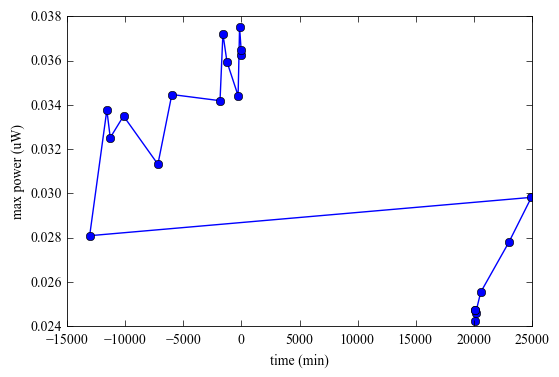

In [29]:
from analysis.lib.Qmemory import CheckLaserPower as Laser; reload(Laser)

# Laser.CheckPower('NewfocusAOM','ADWIN',nr_of_files=10)
Laser.CheckPower('MatisseAOM','ADWIN',nr_of_files=20)

# Memory Paper Plots

In [ ]:
reload(CD)
binwidth = [None,None,None,None,None]
binwidth = [12,12,25,25,25]
start_tstamps = ['20151105_032629','20151031_182230','20151025_235900','20151024_131500','20151024_233353' ]
stop_timestamps = [ '20151103_211016','20151030_220005','20151025_102306','20151023_193751','20151024_145547']
CD.repump_speed_paper_plot(older_than=start_tstamps, newer_than=stop_timestamps, binwidth_ns=binwidth,
        exclude_first_n_points = [5,7,2,2,2], offset = [0.,0.,0.,0.,0.], amplitude = [0.8,0.8,0.8,0.8, 0.8], 
        x0 = [0.,0.,0.,0., 0.], decay_constant_one = [50, 20,300,150,200],
        decay_constant_two = [500.,523.,800.,800.,500.], labels = ['E 2000 nW','A 2000 nW','A 190 nW','A 100 nW','A 50 nW'],
        x_offs=[0,0,0,0,0], colors=['y','g','c','b','k'], cutoff_ns = [1000,1200,1800,2500,1000],#[800,2200,1200,1500],
        plot_fit = True, do_print = False, fixed = [[0],[0],[0],[0],[0]], show_guess = False)

In [ ]:
reload(CD)
tstamps_E = ['20151219_215910','20151219_215525','20151219_215138']#,
tstamps_A = ['20151221_161917','20151221_161445','20151221_161024']
CD.repump_speed_pm1_paper_plot(tstamps_E=tstamps_E,tstamps_A=tstamps_A, binwidth_ns=[17,17,17], 
        labels = [r'$p_{\left|+1\right\rangle}$',r'$p_{\left|-1\right\rangle}$',r'$1-p_{\left|0\right\rangle}$'], #ssro_calib_timestamp=['20151221_160634',None],
        exclude_first_n_points_A = [6,6,6], exclude_first_n_points_E = [12,12,12], offset = [0.,0.,0.], amplitude = [0.2,0.7,0.7], x0 = [0.,0.,0.], decay_constant_one = [50,50,50], 
        decay_constant_two = [440.,440.,440.], x_offs=[-200,0,0], colors=['k','r','b','g'], cutoff_ns = [600,600,600],
        plot_fit = True, do_print = False, marker = ['+', 'x', '.'], fixed = [[0,3,4],[0,2,3],[0,2,3]], show_guess = False)

In [ ]:
reload(CD)
f_name = 'Memory_Sweep_repump_time_'
older_than = '20151022_190000'#'20151022_220000'
CD.avg_repump_time_paper_plot(carbons = ['1','5','2','3'], colors=['b','c','g','y'],
                              folder_name = f_name, older_than = older_than, save=False, fig_name = 'Fig3a_avgRPtime', CR_after_check=False) 

In [ ]:
reload(CD) 
# CD.Sweep_Rep_List(carbons = ['3','6'],older_than = '20151102_080000', save=True) 
older_than = '20151102_080000'
logicstate_list = ['X']*5 # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(carbons = ['6','1','5','2','3'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=True, older_than = older_than, 
            x_max = 800, colors = ['k','b','c','g','y'],  plotquantum = True, plotclassical = True, fig_name='Fig3_XDecay', plotlabel ='(b)')
logicstate_list = ['X','X','X','mX'] # length should be equally long to the carbon list
CD.decay_vs_rep_paper_plot(carbons = ['5','2','25','25'], logicstate_list = logicstate_list,
            fit_results = True,do_T2correct=True, older_than = older_than,plotquantum = True,plotclassical = True,
            x_max=2300, colors = ['c','g','m','r'], fig_name='Fig4a_DFS', plotlabel ='(a)')

In [ ]:
reload(CD)

update_data = True
try:  #does last data exist?
    dummy = lastdata
except:
    print 'No last data'
    update_data = True
    lastdata=None

do_T2correct = True
LogPlot = True

c_idents = ['1','2','3','5','6','12','13','15','16','23','25','26','35','36','56']
#c_idents = ['1','2','15','16']

older_than_list=['20151105_050000', '20151102_080000','20151026_020000','20151024_131500','20151025_030000']
labels = ['E 2000 nW', 'A 2000 nW','A 190 nW','A 100 nW','A 50 nW']
styles = ['yo', 'go', 'co', 'bo',  'ko']
fit_colors = ['y','g','c', 'b' ,'k']   # no color assigned means no fit is done.

lastdata = CD.coupling_vs_rep_paper_plot(c_idents=c_idents, older_than_list=older_than_list, 
                labels = labels, styles=styles, fit_colors=fit_colors, LogPlot=LogPlot, 
                fixed = [[0],[0],[0],[0],[0]], CR_after_check=True,
                update_data=update_data, lastdata = lastdata, do_T2correct=do_T2correct, 
                fit_guess = (1,0.00044,0), fit_guess_art = (1, 0.00044,0))

In [2]:
reload(CD)
#tstamps = ['20151030_164714','20151030_165302','20151103_185409'] #'20150826_102333'], #A1 only: '20150902_142407']
start_tstamps = ['20151203_150419','20151203_150117','20151203_150815']#,'20150902_142407'] #'20150826_102333'], #A1 only: '20150902_142407'],
stop_timestamps = ['20151203_150117','20151203_145911','20151203_150649']
binwidth_ns = [None,None,20]
tau, tau_err = CD.repump_speed_paper_plot(older_than=start_tstamps, newer_than=stop_timestamps, binwidth_ns=binwidth_ns,
        exclude_first_n_points = [6,6,6], offset = [0.0,0.0,0.0], amplitude = [0.8,0.8,0.8], x0 = [0.,0.,0.], decay_constant_one = [30,30,30], 
        decay_constant_two = [300.,300.,300], x_offs=[0,0.0,10], colors=['r','k','b','g'],
        plot_fit = True, do_print = False, fixed = [[0],[0],[]], show_guess = False, invert=[True,False,False,True])

NameError: name 'CD' is not defined

In [98]:
a = [3,4,5,6]
# all(x in ['b', 'a', 'foo', 'bar'] for x in ['a', 'b'])
if any(s not in a for s in [3,6]):
    print 'yeah'

In [99]:
range(1)

[0]

In [24]:
0 == None

False